Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


                                           ttext_stem  ttype
0   работа|полный|пиддес|равнодушие|скука|каждый|з...     -1
1   коллега|сидеть|рубиться|urban|terror|долбать|в...     -1
2                     user|говорят|обещаной|год|ждать     -1
3   желать|хороший|полёт|удачный|посадка|очень|сил...     -1
4   обновить|леший|surf|работать|простоплеер|груст...     -1
5   котёнок|вчера|носик|разбить|плакать|расстраива...     -1
6   user|user|user|заслать|затихариться|прямо|физи...     -1
7   вообще|болеть|выздоравливать|грусть|разочарование     -1
8   микрофраза|грусть|разочарование|учиться|срать|...     -1
9            хотеть|помириться|сук|гордый|это|сделать     -1
10  user|user|ебета|фотка|твой|молчать|вообще|знае...     -1
11  блин|начать|сниться|сон|сниться|сказать|каждый...     -1
12               user|твой|место|сначала|телек|купить     -1
13                  user|плохо|бояться|значит|мск|бгр     -1
14  хотеть|электромобиль|http|недоверие|сомнение|c...     -1
15          скоро|увидет

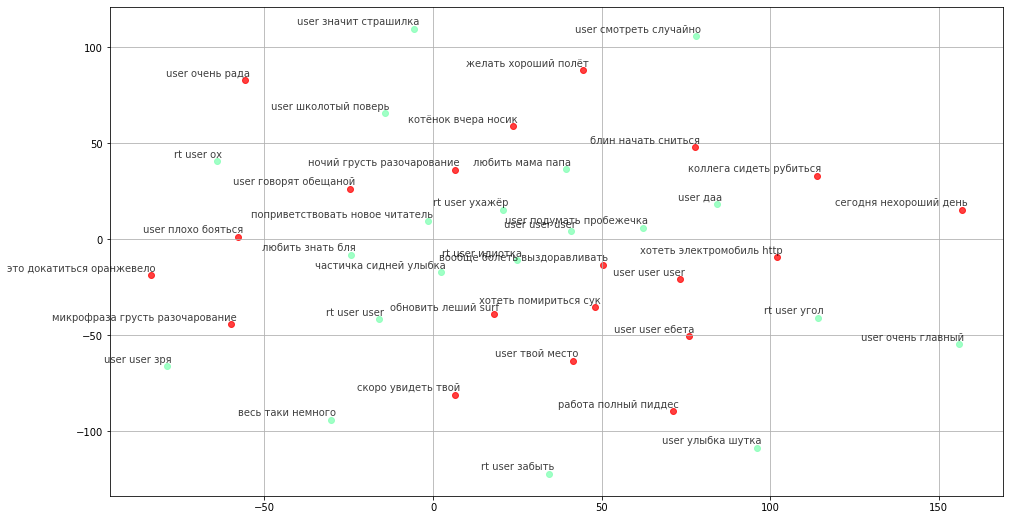

In [2]:
#doc2vec

from gensim.models import Doc2Vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pymysql
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')

model = Doc2Vec.load("/gdrive/My Drive/Colab Notebooks/dm300/model_dm300_iter_0.doc2vec")

def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

#подключение к базе данных
def get_connection():
    connection = pymysql.connect(host='database-3.chim8btj05zt.us-east-1.rds.amazonaws.com',
                                 user='admin',
                                 password='01035007',
                                 db='test',
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
    return connection


connection = get_connection()

try:
    with connection.cursor() as cursor:
        s = "SELECT ttext_stem, ttype FROM sort_v2 WHERE ttype = -1 LIMIT 20"
        cursor.execute(s)
        result = cursor.fetchall()
        data_n = pd.DataFrame(result)
        print(data_n)
        s = "SELECT ttext_stem, ttype FROM sort_v2 WHERE ttype = 1 LIMIT 20"
        cursor.execute(s)
        result = cursor.fetchall()
        data_p = pd.DataFrame(result)
        print(data_p)

        data = pd.concat([data_p, data_n], ignore_index = True)
        print(data)
      
finally:
    connection.close()

tokens = list()
labels = list()
classes = list()
for d, i in zip(data['ttext_stem'], data['ttype']):
    labels.append(' '.join(d.split('|')[:3]))
    tokens.append(model.infer_vector(d.split('|')))
    classes.append(i)
samples = 3

tsne_plot(labels, tokens, classes, samples)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


                                           ttext_stem  ttype
0   работа|полный|пиддес|равнодушие|скука|каждый|з...     -1
1   коллега|сидеть|рубиться|urban|terror|долбать|в...     -1
2                     user|говорят|обещаной|год|ждать     -1
3   желать|хороший|полёт|удачный|посадка|очень|сил...     -1
4   обновить|леший|surf|работать|простоплеер|груст...     -1
5   котёнок|вчера|носик|разбить|плакать|расстраива...     -1
6   user|user|user|заслать|затихариться|прямо|физи...     -1
7   вообще|болеть|выздоравливать|грусть|разочарование     -1
8   микрофраза|грусть|разочарование|учиться|срать|...     -1
9            хотеть|помириться|сук|гордый|это|сделать     -1
10  user|user|ебета|фотка|твой|молчать|вообще|знае...     -1
11  блин|начать|сниться|сон|сниться|сказать|каждый...     -1
12               user|твой|место|сначала|телек|купить     -1
13                  user|плохо|бояться|значит|мск|бгр     -1
14  хотеть|электромобиль|http|недоверие|сомнение|c...     -1
15          скоро|увидет

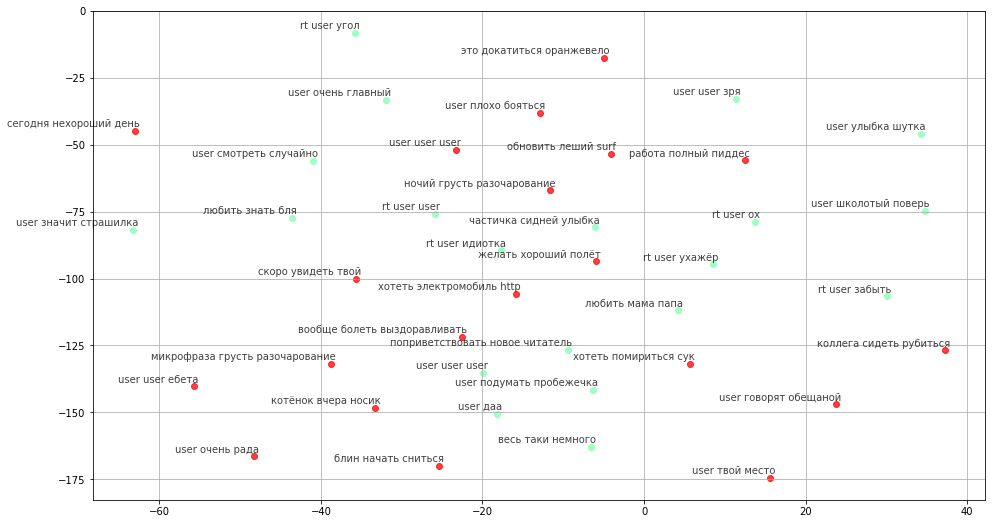

In [3]:
#doc2vec

from gensim.models import Doc2Vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pymysql
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')

model = Doc2Vec.load("/gdrive/My Drive/Colab Notebooks/dm300/model_dm300_iter_2.doc2vec")

def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

#подключение к базе данных
def get_connection():
    connection = pymysql.connect(host='database-3.chim8btj05zt.us-east-1.rds.amazonaws.com',
                                 user='admin',
                                 password='01035007',
                                 db='test',
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
    return connection


connection = get_connection()

try:
    with connection.cursor() as cursor:
        s = "SELECT ttext_stem, ttype FROM sort_v2 WHERE ttype = -1 LIMIT 20"
        cursor.execute(s)
        result = cursor.fetchall()
        data_n = pd.DataFrame(result)
        print(data_n)
        s = "SELECT ttext_stem, ttype FROM sort_v2 WHERE ttype = 1 LIMIT 20"
        cursor.execute(s)
        result = cursor.fetchall()
        data_p = pd.DataFrame(result)
        print(data_p)

        data = pd.concat([data_p, data_n], ignore_index = True)
        print(data)
      
finally:
    connection.close()

tokens = list()
labels = list()
classes = list()
for d, i in zip(data['ttext_stem'], data['ttype']):
    labels.append(' '.join(d.split('|')[:3]))
    tokens.append(model.infer_vector(d.split('|')))
    classes.append(i)
samples = 3

tsne_plot(labels, tokens, classes, samples)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


                                           ttext_stem  ttype
0   работа|полный|пиддес|равнодушие|скука|каждый|з...     -1
1   коллега|сидеть|рубиться|urban|terror|долбать|в...     -1
2                     user|говорят|обещаной|год|ждать     -1
3   желать|хороший|полёт|удачный|посадка|очень|сил...     -1
4   обновить|леший|surf|работать|простоплеер|груст...     -1
5   котёнок|вчера|носик|разбить|плакать|расстраива...     -1
6   user|user|user|заслать|затихариться|прямо|физи...     -1
7   вообще|болеть|выздоравливать|грусть|разочарование     -1
8   микрофраза|грусть|разочарование|учиться|срать|...     -1
9            хотеть|помириться|сук|гордый|это|сделать     -1
10  user|user|ебета|фотка|твой|молчать|вообще|знае...     -1
11  блин|начать|сниться|сон|сниться|сказать|каждый...     -1
12               user|твой|место|сначала|телек|купить     -1
13                  user|плохо|бояться|значит|мск|бгр     -1
14  хотеть|электромобиль|http|недоверие|сомнение|c...     -1
15          скоро|увидет

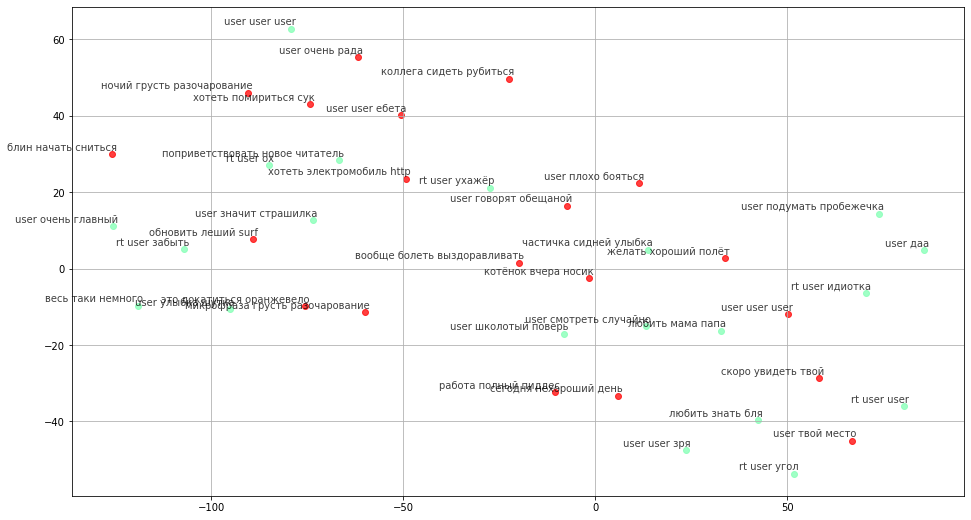

In [4]:
#doc2vec

from gensim.models import Doc2Vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pymysql
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')

model = Doc2Vec.load("/gdrive/My Drive/Colab Notebooks/dbow300/model_dbow300_iter_0.doc2vec")

def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

#подключение к базе данных
def get_connection():
    connection = pymysql.connect(host='database-3.chim8btj05zt.us-east-1.rds.amazonaws.com',
                                 user='admin',
                                 password='01035007',
                                 db='test',
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
    return connection


connection = get_connection()

try:
    with connection.cursor() as cursor:
        s = "SELECT ttext_stem, ttype FROM sort_v2 WHERE ttype = -1 LIMIT 20"
        cursor.execute(s)
        result = cursor.fetchall()
        data_n = pd.DataFrame(result)
        print(data_n)
        s = "SELECT ttext_stem, ttype FROM sort_v2 WHERE ttype = 1 LIMIT 20"
        cursor.execute(s)
        result = cursor.fetchall()
        data_p = pd.DataFrame(result)
        print(data_p)

        data = pd.concat([data_p, data_n], ignore_index = True)
        print(data)
      
finally:
    connection.close()

tokens = list()
labels = list()
classes = list()
for d, i in zip(data['ttext_stem'], data['ttype']):
    labels.append(' '.join(d.split('|')[:3]))
    tokens.append(model.infer_vector(d.split('|')))
    classes.append(i)
samples = 3

tsne_plot(labels, tokens, classes, samples)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


                                           ttext_stem  ttype
0   работа|полный|пиддес|равнодушие|скука|каждый|з...     -1
1   коллега|сидеть|рубиться|urban|terror|долбать|в...     -1
2                     user|говорят|обещаной|год|ждать     -1
3   желать|хороший|полёт|удачный|посадка|очень|сил...     -1
4   обновить|леший|surf|работать|простоплеер|груст...     -1
5   котёнок|вчера|носик|разбить|плакать|расстраива...     -1
6   user|user|user|заслать|затихариться|прямо|физи...     -1
7   вообще|болеть|выздоравливать|грусть|разочарование     -1
8   микрофраза|грусть|разочарование|учиться|срать|...     -1
9            хотеть|помириться|сук|гордый|это|сделать     -1
10  user|user|ебета|фотка|твой|молчать|вообще|знае...     -1
11  блин|начать|сниться|сон|сниться|сказать|каждый...     -1
12               user|твой|место|сначала|телек|купить     -1
13                  user|плохо|бояться|значит|мск|бгр     -1
14  хотеть|электромобиль|http|недоверие|сомнение|c...     -1
15          скоро|увидет

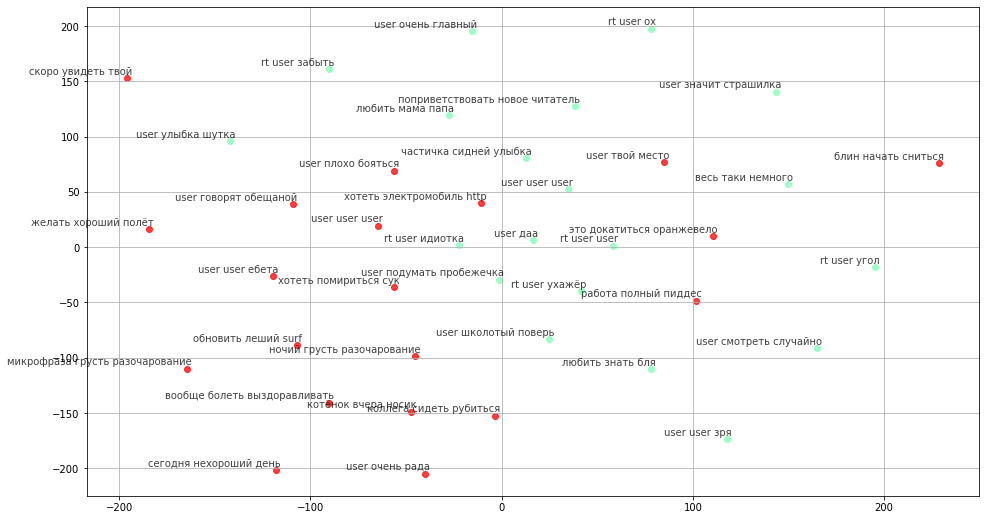

In [5]:
#doc2vec

from gensim.models import Doc2Vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pymysql
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')

model = Doc2Vec.load("/gdrive/My Drive/Colab Notebooks/dbow300/model_dbow300_iter_7.doc2vec")

def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], color=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

#подключение к базе данных
def get_connection():
    connection = pymysql.connect(host='database-3.chim8btj05zt.us-east-1.rds.amazonaws.com',
                                 user='admin',
                                 password='01035007',
                                 db='test',
                                 charset='utf8mb4',
                                 cursorclass=pymysql.cursors.DictCursor)
    return connection


connection = get_connection()

try:
    with connection.cursor() as cursor:
        s = "SELECT ttext_stem, ttype FROM sort_v2 WHERE ttype = -1 LIMIT 20"
        cursor.execute(s)
        result = cursor.fetchall()
        data_n = pd.DataFrame(result)
        print(data_n)
        s = "SELECT ttext_stem, ttype FROM sort_v2 WHERE ttype = 1 LIMIT 20"
        cursor.execute(s)
        result = cursor.fetchall()
        data_p = pd.DataFrame(result)
        print(data_p)

        data = pd.concat([data_p, data_n], ignore_index = True)
        print(data)
      
finally:
    connection.close()

tokens = list()
labels = list()
classes = list()
for d, i in zip(data['ttext_stem'], data['ttype']):
    labels.append(' '.join(d.split('|')[:3]))
    tokens.append(model.infer_vector(d.split('|')))
    classes.append(i)
samples = 3

tsne_plot(labels, tokens, classes, samples)